In [7]:
# importing libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Modelling and Testing
import statsmodels.api as sm
from scipy.stats import shapiro
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV

# Evaluating the models
from sklearn.metrics import r2_score, mean_squared_error
pd.set_option('MAX_COLUMNS', None)

# 0.0 Problem Description
### Problem Statement

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

Which variables are significant in predicting the price of a car How well those variables describe the price of a car Based on various market surveys, the consulting firm has gathered a large data set of different types of cars across the America market.

### Business Goal

We are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.


# 0.1 Colect the Data

In [8]:
data = pd.read_csv('data/CarPrice_Assignment.csv')
data.set_index('car_ID', inplace=True)
data.drop('CarName', inplace=True, axis=1)
data.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,,,,,,,,,,
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
2,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
4,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
5,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [9]:
#Describe the data
data.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [10]:
# My own describe
pd.DataFrame({'missing': data.isna().mean(),
              'unicos': data.nunique(),
              'tipos': data.dtypes})

,missing,unicos,tipos
symboling,0.0,6,int64
fueltype,0.0,2,object
aspiration,0.0,2,object
doornumber,0.0,2,object
carbody,0.0,5,object
drivewheel,0.0,3,object
enginelocation,0.0,2,object
wheelbase,0.0,53,float64
carlength,0.0,75,float64
carwidth,0.0,44,float64


In [11]:
# Changing the type of variable 'symboling' because it was guessed as int and its in fact a ordinal categorical variable.
data['symboling'] = data['symboling'].astype('object') 

There is no missing values. Horray!

# 1.0 Univariate Analysis
We can see that our target variable is right-skewed let's fix it performing a log transformation.

In [25]:
# Spliting the data
target = data[['price']]
categorical_vars = data.select_dtypes('object')
numerical_vars = data.select_dtypes(['int64', 'float64'])
numerical_vars.drop('price', inplace=True, axis=1)

/home/brunods/anaconda3/envs/ds-env-38/lib/python3.8/site-packages/pandas/core/frame.py:4160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Skewness: price    1.777678
dtype: float64
Kurtosis: price    3.051648
dtype: float64
Statistics p-value: 1.8491777441833604e-15
Target does not look Gaussian (reject H0)


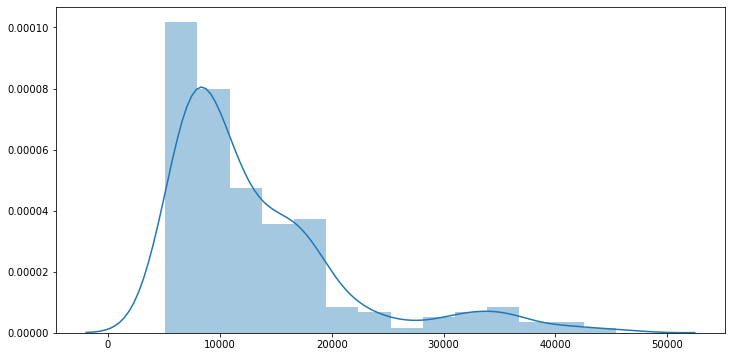

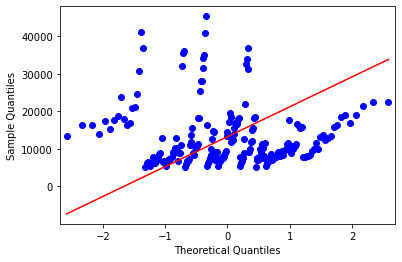

In [26]:
# Target Analysis
# Skew and Kurt
skew = target.skew()
kurt = target.kurt()
print(f'Skewness: {skew}')
print(f'Kurtosis: {kurt}')

# Distribucion
f, ax = plt.subplots(figsize=(12,6))
sns.distplot(target)

# qqplot
norm = sm.qqplot(target, line='s')

# Normality Shapiro test
stats, p = shapiro(target)
print(f'Statistics p-value: {p}')
# interpret
alpha = 0.05
if p > alpha:
    print('Target looks Gaussian (fail to reject H0)')
else:
    print('Target does not look Gaussian (reject H0)')

Skewness: 0.672888533977329
Kurtosis: -0.21065266150624096
Statistics p-value: 1.0736105195974233e-06
Target does not look Gaussian (reject H0)


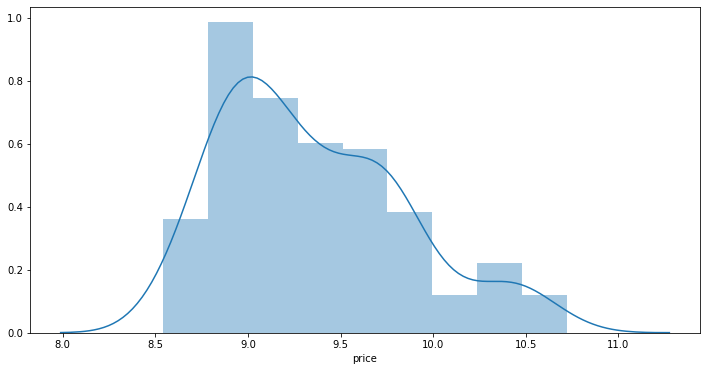

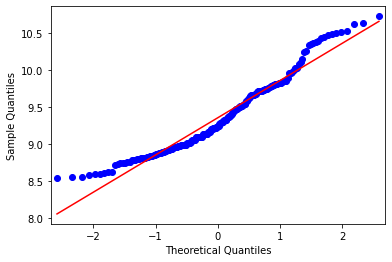

In [27]:
# Transforming the target

target_norm = np.log(data['price'])

# Skew and Kurt
skew = target_norm.skew()
kurt = target_norm.kurt()
print(f'Skewness: {skew}')
print(f'Kurtosis: {kurt}')

# Distribucion
f, ax = plt.subplots(figsize=(12,6))
sns.distplot(target_norm)

# qqplot
norm = sm.qqplot(target_norm, line='s')

# Normality Shapiro test
stats, p = shapiro(target_norm)
print(f'Statistics p-value: {p}')
# interpret
alpha = 0.05
if p > alpha:
    print('Target looks Gaussian (fail to reject H0)')
else:
    print('Target does not look Gaussian (reject H0)')

The target distribution still not gaussian, once it fails to the Shapiro test, but it's way closer to a Gaussian distribution than before.

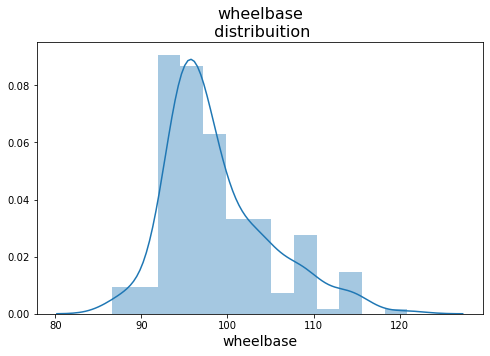

Statistics p-value: 1.0368441660801864e-09
Target does not look Gaussian (reject H0)


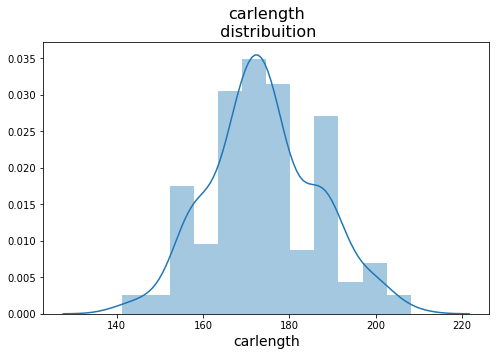

Statistics p-value: 0.01036272943019867
Target does not look Gaussian (reject H0)


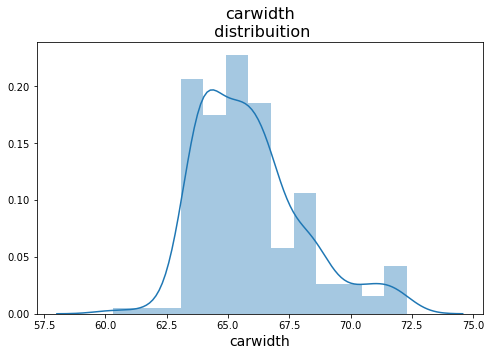

Statistics p-value: 5.012857240416224e-09
Target does not look Gaussian (reject H0)


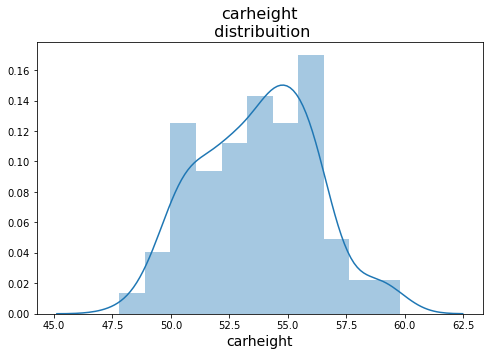

Statistics p-value: 0.021682262420654297
Target does not look Gaussian (reject H0)


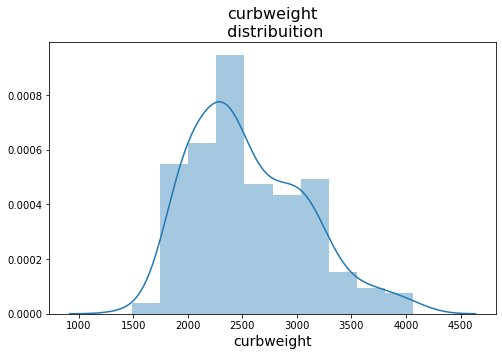

Statistics p-value: 2.8916113024024526e-06
Target does not look Gaussian (reject H0)


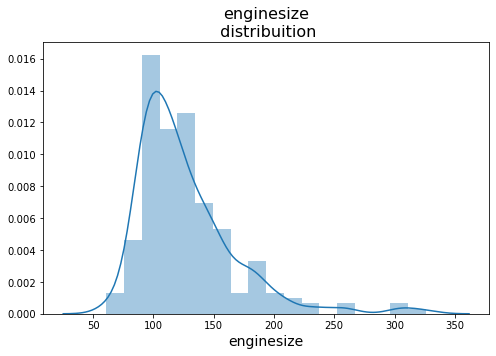

Statistics p-value: 3.0569154792128156e-14
Target does not look Gaussian (reject H0)


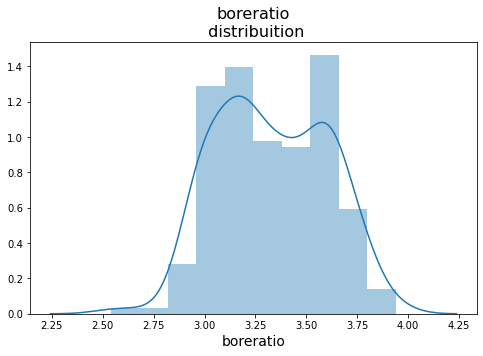

Statistics p-value: 0.00010423624189570546
Target does not look Gaussian (reject H0)


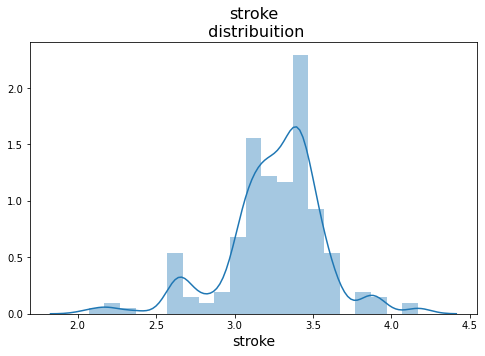

Statistics p-value: 1.0997246135957539e-07
Target does not look Gaussian (reject H0)


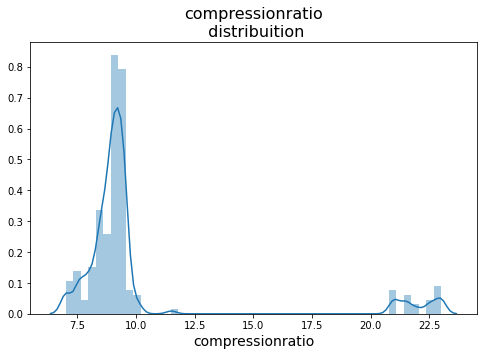

Statistics p-value: 8.12114079238121e-24
Target does not look Gaussian (reject H0)


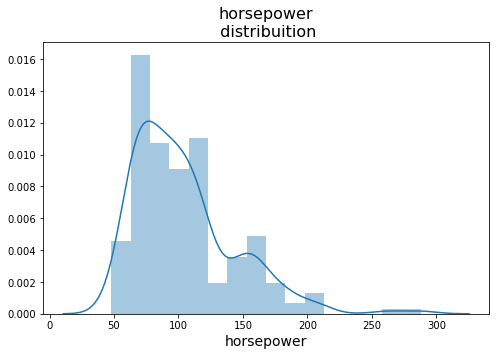

Statistics p-value: 1.7366445087541038e-11
Target does not look Gaussian (reject H0)


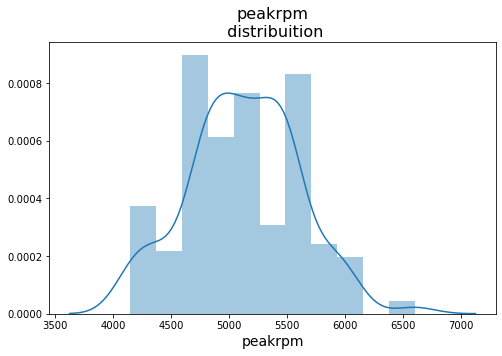

Statistics p-value: 0.00026844633975997567
Target does not look Gaussian (reject H0)


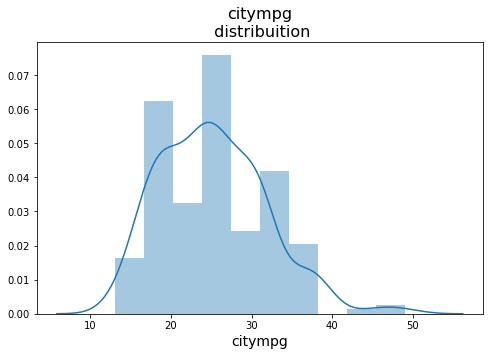

Statistics p-value: 7.825866305211093e-06
Target does not look Gaussian (reject H0)


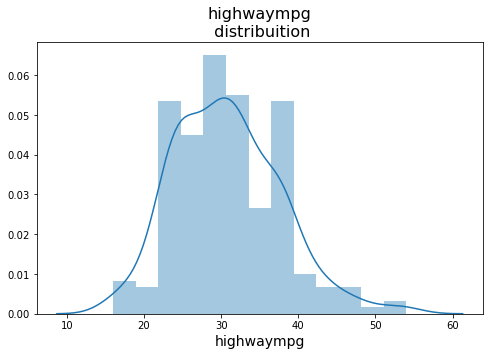

Statistics p-value: 0.0006515368004329503
Target does not look Gaussian (reject H0)


In [28]:
# Numerical variables univariate analysis
def univariate_analysis(df):
    """
    Function to perform univariate analysis.

    df: DataFrame
    """
    for col in df.columns.to_list():
        plt.figure(figsize=(8,5))
        plt.title(f'{col}\n distribuition',fontsize=16)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize=14)
        plt.show()

        # Normality Shapiro test
        stats, p = shapiro(df[col])
        print(f'Statistics p-value: {p}')
        # interpret
        alpha = 0.05
        if p > alpha:
            print('Target looks Gaussian (fail to reject H0)')
        else:
            print('Target does not look Gaussian (reject H0)')

univariate_analysis(numerical_vars)

We can see that all of the numerical variables don't pass the Shapiro test so we will perform some transformation on them in the preprocessing stage.

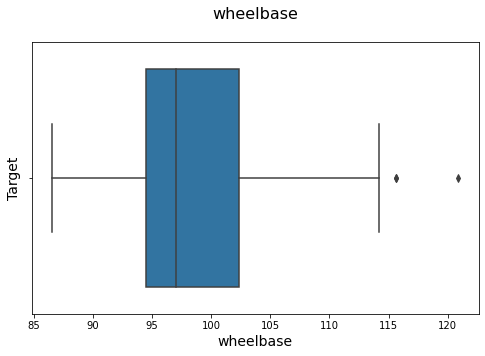

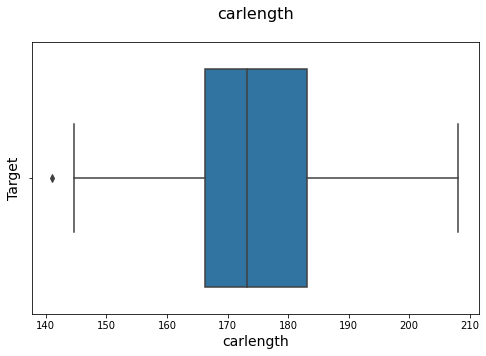

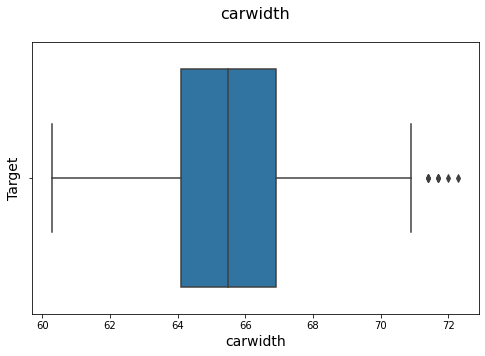

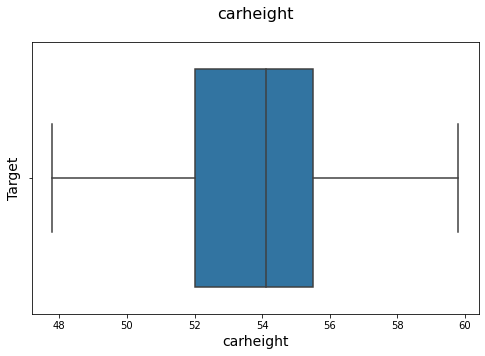

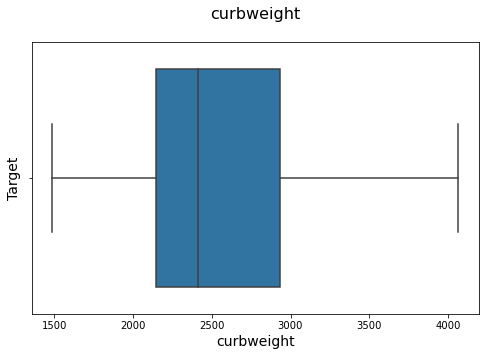

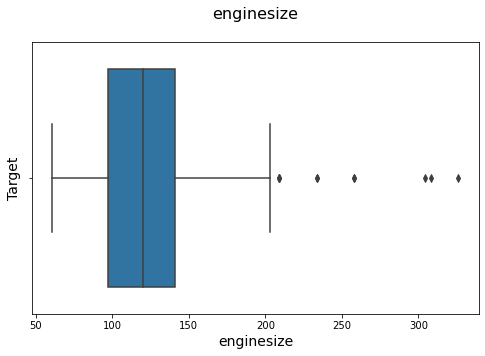

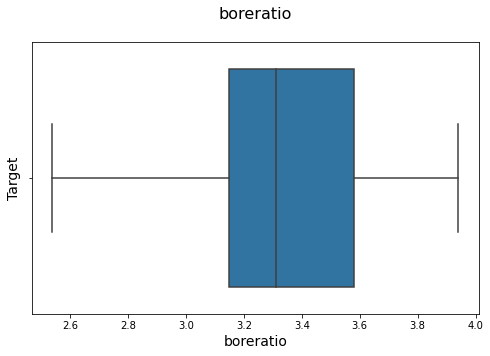

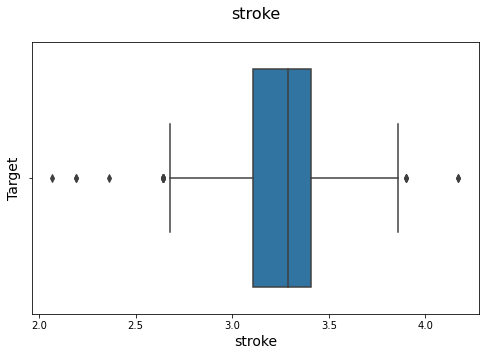

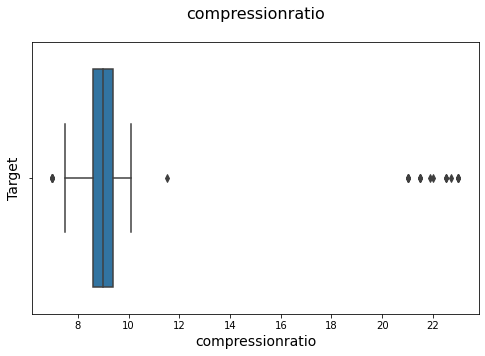

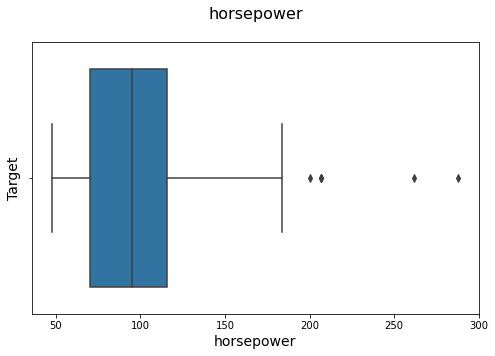

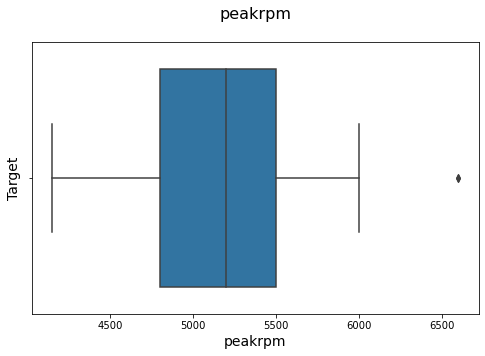

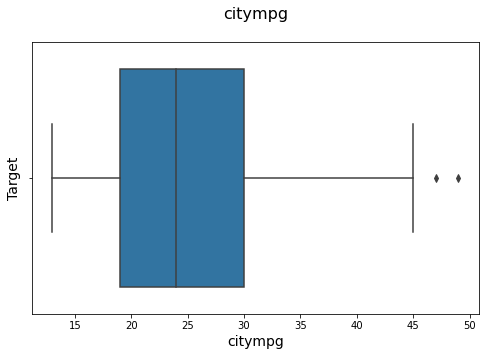

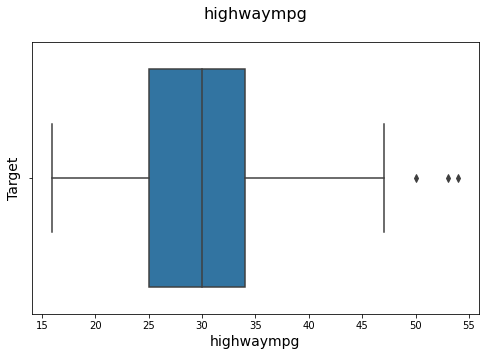

In [29]:
# Checking for outliers
def outliers_analysis(df):
    """
    Function to check for outliers visually through a boxplot

    df: DataFrame
    """
    for col in df.columns.to_list():
        plt.figure(figsize=(8,5))
        plt.title(f'{col}\n',fontsize=16)
        sns.boxplot(x=col, data=df)
        plt.xlabel(col,fontsize=14)
        plt.ylabel('Target',fontsize=14)
        plt.show()


outliers_analysis(numerical_vars)

Our data is not outliers heavy but there are some outliers so we will use RobustScale() to transform our numerical features at Preprocessing stage.

# 1.1 Bivariate Analysis

### Numerical variables.
We can see by plots below that most of the numerical variables hold a linear relationship with our target variable.

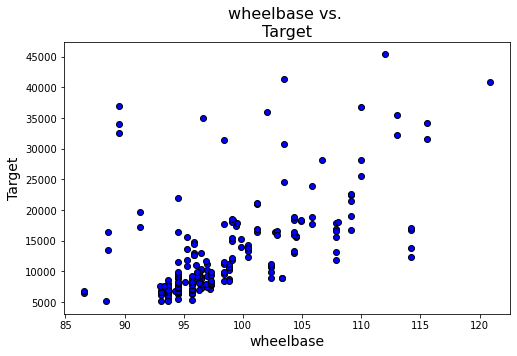

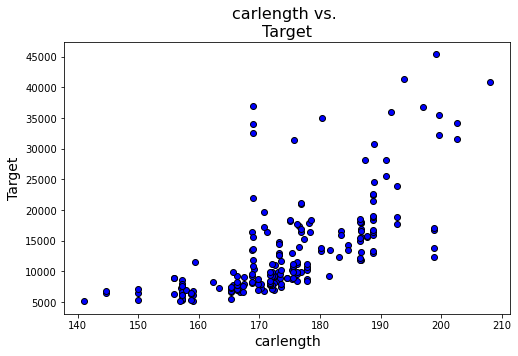

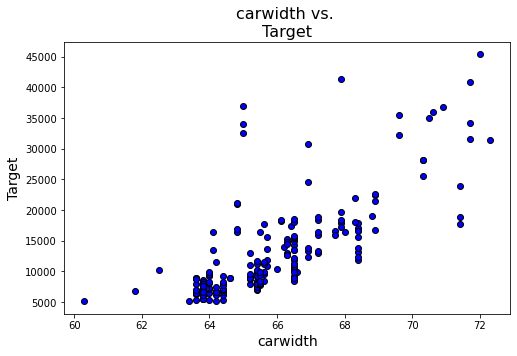

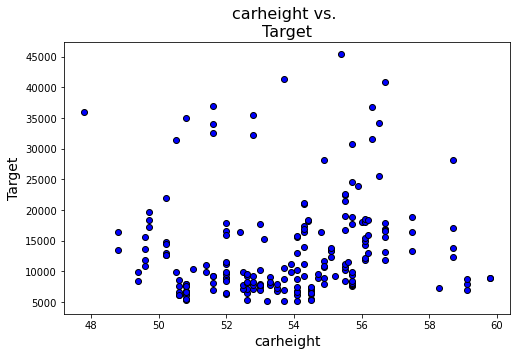

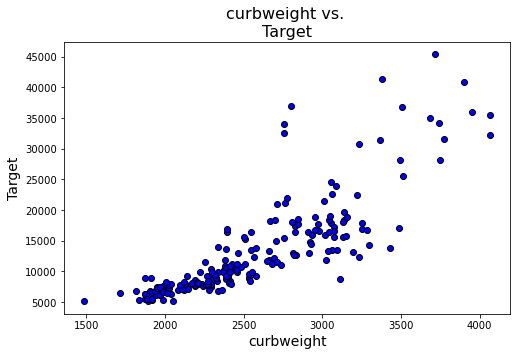

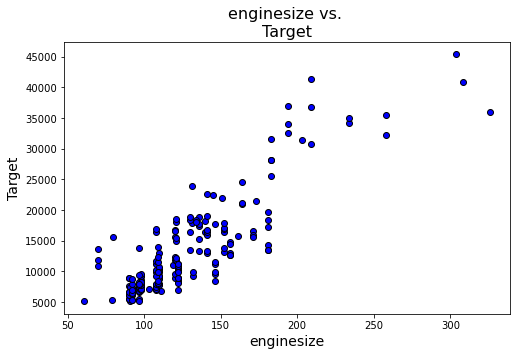

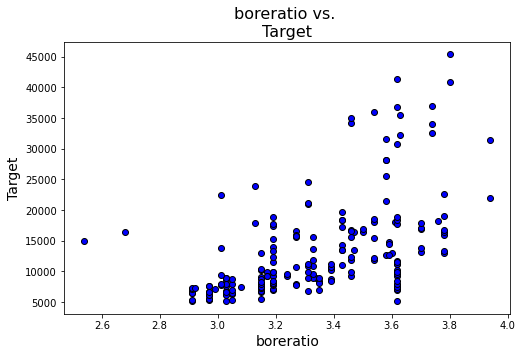

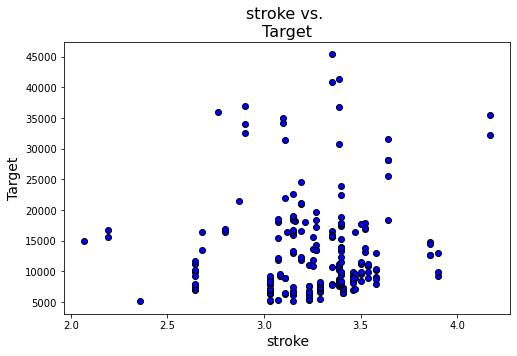

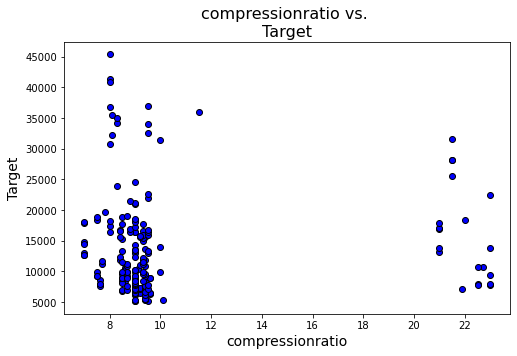

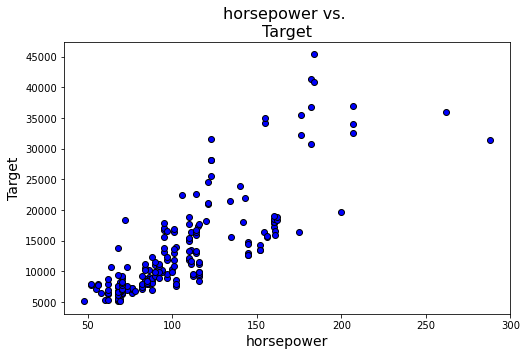

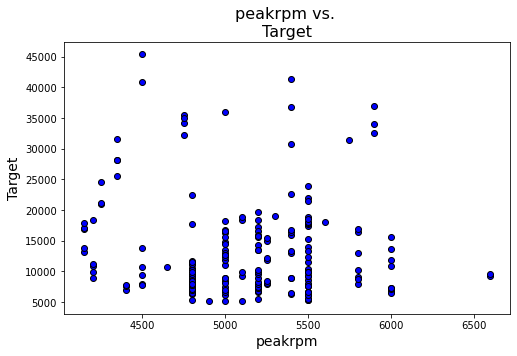

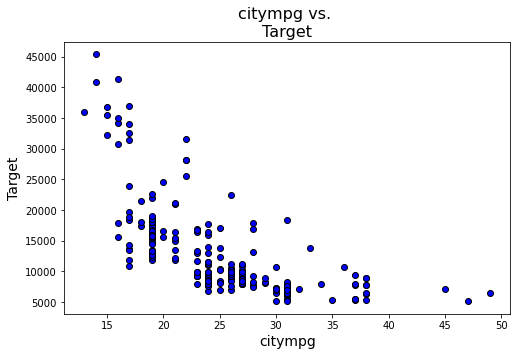

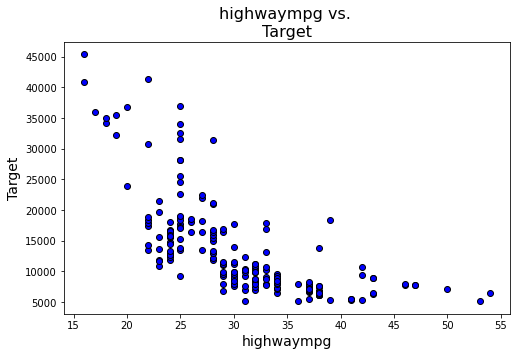

In [30]:
# Variables vs Target
def variables_vs_target(df,target):
    """
    Function to compare variables with the target with a scatterplot.

    df: DataFrame
    target: Variabel Target
    """
    for col in df.columns.to_list():
        plt.figure(figsize=(8,5))
        plt.title(f'{col} vs. \nTarget',fontsize=16)
        plt.scatter(x=df[col],y=target,color='blue',edgecolor='k')
        plt.xlabel(col, fontsize=14)
        plt.ylabel('Target', fontsize=14)
        plt.show()


variables_vs_target(numerical_vars,target=target)

### Categorical variables

Through the plots below, we can see some interesting patterns such as:

- Cars with diesel and turbo trends to be more expensive.
- Rwd drivewheel trends to be more expensive than the others.
- Engine located at rear trends to be more expensive.

Between other patterns.

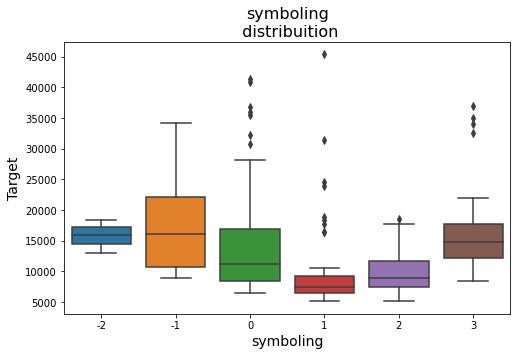

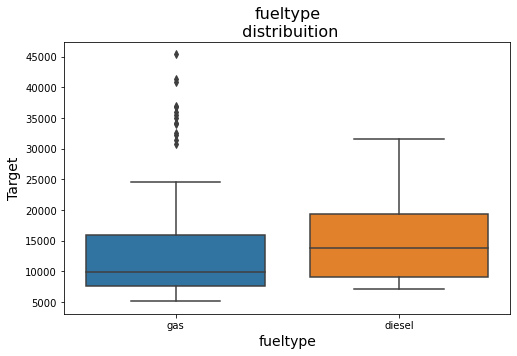

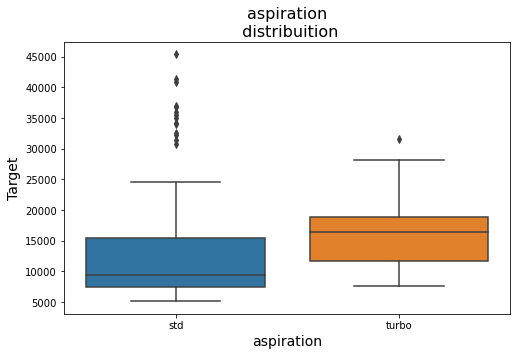

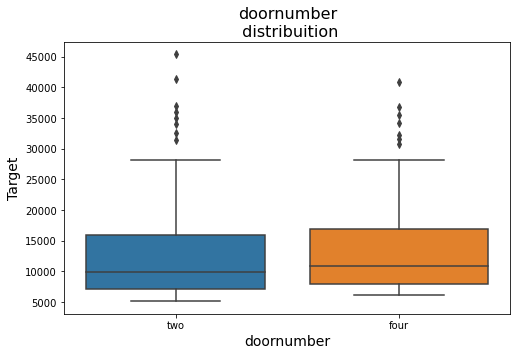

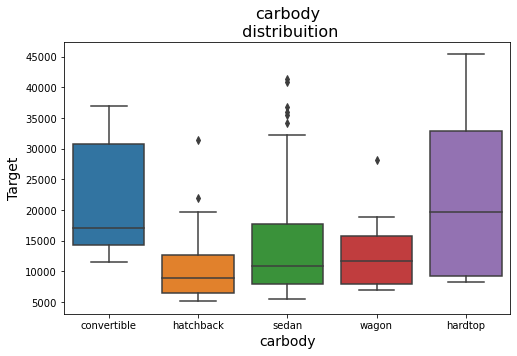

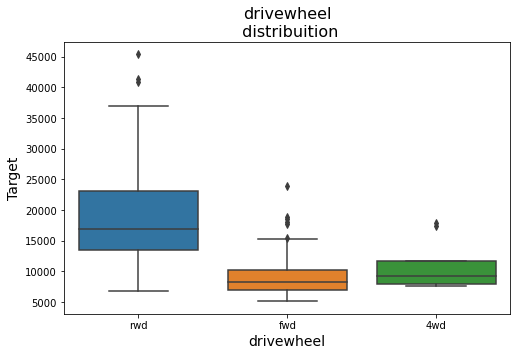

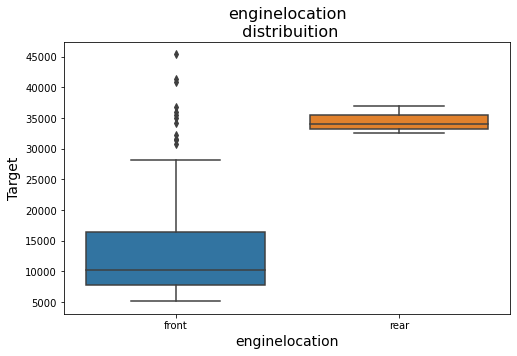

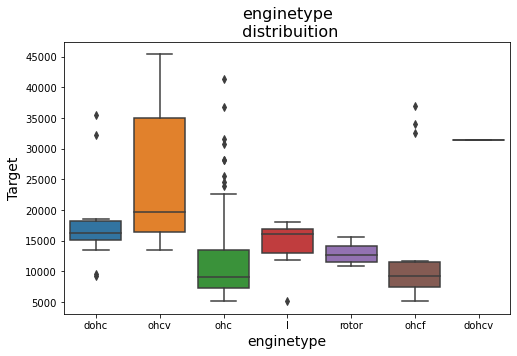

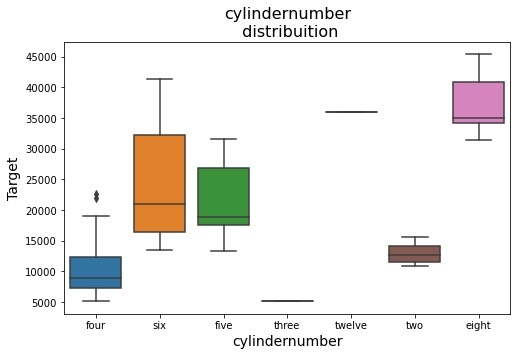

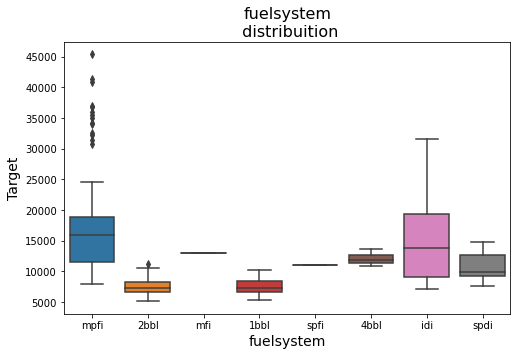

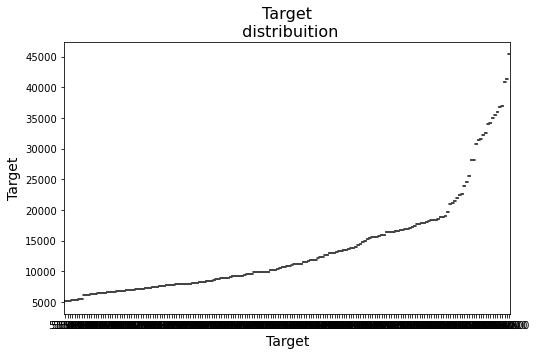

In [31]:
categorical_boxplots = categorical_vars.copy()
categorical_boxplots['Target'] = target


def categorical_analysis(df):
    """
    Function to analyze the target variable vs categorical ones.

    df: DataFrame
    """
    for col in df.columns.to_list():
        plt.figure(figsize=(8, 5))
        plt.title(f'{col}\n distribuition', fontsize=16)
        sns.boxplot(x=col, y='Target', data=df)
        plt.xlabel(col, fontsize=14)
        plt.ylabel('Target', fontsize=14)
        plt.show()


categorical_analysis(categorical_boxplots)

# 2.0 Preprocessing to modeling with scikitlearn

In [32]:
# Getting 'symboling' out of the mix, once its an ordinal categorical
labels = categorical_vars.columns.to_list()[1:]
categorical_vars = categorical_vars[labels]

# Spliting the data
X_treino, X_teste, y_treino, y_teste = train_test_split(data, target_norm,
                                                        test_size=.10,
                                                        shuffle=True, random_state=3)


# Categorical Pipeline
categorical_pipeline = Pipeline([('ohe', OneHotEncoder())])

# Numerical Pipeline
numerical_pipeline = Pipeline([('scaler', RobustScaler())])

# Pipeline
pipeline = ColumnTransformer([('cat', categorical_pipeline, categorical_vars.columns.to_list()),
                              ('num', numerical_pipeline, numerical_vars.columns.to_list())])

# 2.1 - SciKit - Multiple Linear Regression
**Multiple Linear Regression:**
Multiple regression is an extension of simple regression we use it when we want to predict a continuous variable based on more than one predictor(simple regression).

The formula of multiple Regression is

$$ y = b1*variable1 + b2*variable2 ... bn*variablen + a $$
  
   Where:

    b = Angular coefficient of each variable.
    a = Intercept of the population.
   
   
We can evaluate the performance of our model, basically, by calculating the distance of the prediction to the observed value in a validation dataset.

Below the approaches that we will use to evaluate de models here.



Why R2 and RMSE  to evaluate the models?

**R-squared:**

The R-squared tells us the amount of variance our model is capturing from the response variable.

It goes by the formula below:

$$
R^2 = \frac{n \sum xy - \sum x. \sum y}{\sqrt{(n \sum x^2 - (\sum x)^2). (n \sum y^2 - (\sum y)^2)}}
$$

**RMSE:**

The RMSE is the Root Mean Squared Error it measures the average of the squared difference between the predictions and the observed value.
It works like a standard deviation of our predictions, the smaller its value the better, it's also sensitive to outliers and it comes in the same unit values of the response variable.

It goes by the formula below:

$$ RMSE =\sqrt \frac {\sum (Predicted-Actual)²} {N} $$

In [33]:
reg_pipe = Pipeline([('ct',pipeline),
                     ('reg',LinearRegression())])

# Fitting
reg_pipe.fit(X_treino,y_treino)

# Predicting
reg_pred = reg_pipe.predict(X_teste)

# Evaluating
print(f'The R2: {r2_score(np.expm1(y_teste),np.expm1(reg_pred))}')
print(f'The RMSE: {np.sqrt(mean_squared_error(np.expm1(y_teste),np.expm1(reg_pred)))}')
print('\n')
print(f'Intercept: {reg_pipe.named_steps.reg.intercept_}')
print(f'Coefs: {reg_pipe.named_steps.reg.coef_}')

The R2: 0.9851522428940203
The RMSE: 1085.4129488817387


Intercept: -2211225632460.2607
Coefs: [ 4.14604806e+12  1.93482243e+12 -5.22460938e-02  1.16577148e-02
 -8.97216797e-03  8.54492188e-04  1.55151367e-01 -8.42285156e-02
 -6.40869141e-02  2.86254883e-02 -3.46984863e-02  1.23748779e-02
 -2.19726562e-02  1.96228027e-02 -1.93763733e-01  1.92314148e-01
  8.28247070e-02 -4.78942871e-01  6.52465820e-02  2.42187500e-01
  5.92651367e-02 -1.23809814e-01  1.62017822e-01  2.19787598e-01
 -5.75561523e-02 -1.49246216e-01  1.62048340e-02  2.62741089e-01
 -4.51293945e-01  1.60095215e-01  2.76403204e+11  2.76403204e+11
  2.76403204e+11 -1.93482243e+12  2.76403204e+11  2.76403204e+11
  2.76403204e+11  2.76403204e+11  1.60217285e-02 -2.76184082e-03
  9.65194702e-02 -1.99737549e-02  2.32727051e-01  1.13433838e-01
  2.92968750e-03 -5.47485352e-02  4.15039062e-03  1.17614746e-01
  2.11486816e-02 -2.26348877e-01  1.33270264e-01]


# 2.2 - SciKit - Lasso
Lasso regression is a method of feature elimination and shrinkage to linear models. The goal here is to obtain a subset of features that minimizes the prediction errors. It reduces the complexity of the model preventing overfitting.

In [21]:
lasso_pipe = Pipeline([('ct', pipeline),
                         ('reg', LassoCV(alphas=(0.001, 0.1,1.0,5.0,10.0,50.0,100), cv=5))])

#Fitting
lasso_pipe.fit(X_treino,y_treino)

#Predicting
lasso_pred = lasso_pipe.predict(X_teste)

#Evaluating
print(f'The R2: {r2_score(np.expm1(y_teste),np.expm1(lasso_pred))}')
print(f'The RMSE: {np.sqrt(mean_squared_error(np.expm1(y_teste),np.expm1(lasso_pred)))}')
print('\n')
print(f'Best alpha: {lasso_pipe.named_steps.reg.alpha_}')
print(f'Non-zero coefs:{len(lasso_pipe.named_steps.reg.coef_!=0)} from {X_treino.shape[0]} variables')
print(f'Intercept: {lasso_pipe.named_steps.reg.intercept_}')
print(f'Coefs: {lasso_pipe.named_steps.reg.coef_}')

The R2: 0.9837694041529137
The RMSE: 1134.832599697773


Best alpha: 0.001
Non-zero coefs:51 from 184 variables
Intercept: 9.688028128309586
Coefs: [ 0.00000000e+00 -0.00000000e+00 -5.92388447e-02  8.58839193e-16
  0.00000000e+00 -0.00000000e+00  2.18902608e-01  0.00000000e+00
 -4.87910185e-03  6.23905116e-02 -1.26760642e-02 -0.00000000e+00
 -4.22832139e-03  6.13763963e-02 -3.52803950e-01  9.12304813e-16
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00  1.37385642e-01
  0.00000000e+00 -1.19524084e-01  5.63433633e-03  3.97523623e-02
 -3.53740057e-02 -2.05179507e-01  0.00000000e+00  0.00000000e+00
 -1.38471253e-01  7.70574533e-02  0.00000000e+00 -5.72815600e-02
  0.00000000e+00  0.00000000e+00  0.00000000e+00  5.91549579e-02
 -1.26285577e-02 -0.00000000e+00  3.02085691e-03  2.57533396e-02
  7.53421540e-02  0.00000000e+00  2.04537615e-01  9.90420205e-02
  1.99412791e-02 -4.08036456e-02  7.96919665e-03  7.69766015e-02
  2.99194355e-02 -6.50254381e-02  0.00000000e+00]


The lasso model keeps the good performance of the regular linear regression, but due to how its regularization term works some coefficients are penalized to zero performing a kind of feature selection. In our model, we can see that just 51 variables were relevant to it.

# 2.3 - SciKit - Ridge
Ridge is a regularization method in which the main goal is to smooth the variables that are related to each other(multicollinearity) by penalizing ist coeficients through the term lambda. So, ridge regression shrinks the coefficients and it helps to reduce the model complexity and multicollinearity.

When lambda = 0, we have a regular linear regression cost function, that is the lower lambda is more closer to a regular linear regression.

Ridge Cost Function:

$$\text{Cost} = \sum_{i=1}^N\Big\{ y_i - \sum_{j=0}^M \beta_j x_{ij}\Big\}^2 + \lambda \sum_{j=0}^M w_j^2$$

In [22]:

ridge_pipe = Pipeline([('ct',pipeline),
                         ('reg',RidgeCV(alphas=(0.1,1.0,5.0,10.0,50.0,100), cv=5))])


#Fitting
ridge_pipe.fit(X_treino,y_treino)

#Predicting
ridge_pred = ridge_pipe.predict(X_teste)

#Evaluating
print(f'The R2: {r2_score(np.expm1(y_teste),np.expm1(ridge_pred))}')
print(f'The RMSE: {np.sqrt(mean_squared_error(np.expm1(y_teste),np.expm1(ridge_pred)))}')
print('\n')
print(f'Best alpha: {ridge_pipe.named_steps.reg.alpha_}')
print(f'Intercept: {ridge_pipe.named_steps.reg.intercept_}')
print(f'Coefs: {ridge_pipe.named_steps.reg.coef_}')

The R2: 0.9780735135833964
The RMSE: 1319.013052926134


Best alpha: 5.0
Intercept: 9.461642189894166
Coefs: [ 0.01551348 -0.01551348 -0.02814397  0.02814397 -0.00013619  0.00013619
  0.11742329 -0.01801523 -0.05622303  0.01017255 -0.05335759 -0.01197965
 -0.03974239  0.05172204 -0.0939621   0.0939621  -0.01157651 -0.02624277
 -0.0145168   0.09803099  0.00232929 -0.0868282   0.038804    0.04993464
  0.01369344 -0.13110127  0.04917702  0.03036226 -0.0508701   0.038804
 -0.0044566  -0.05958048  0.01474962  0.01551348  0.00253866  0.05303702
 -0.02299512  0.00119343  0.00356365  0.04299803  0.07940217  0.00693323
  0.12060403  0.10854362  0.01971743 -0.03556426  0.00719406  0.09904353
  0.03793516 -0.0776658  -0.00113318]


The ridge model performed a little worst than the other two. 

If I have to choose here a model to go into production, I would go if Lasso because of its capability of feature selection.

# 3.0 Preprocessing to modeling with statsmodel

In [35]:
# Getting 'symboling' out of the mix, once its an ordinal categorical
labels = categorical_vars.columns.to_list()[1:]
categorical_vars_stats = categorical_vars[labels]

# One-Hot-Encoding
categorical_vars_ohe = pd.get_dummies(categorical_vars_stats)

# Numerical transformation
skewed_vars = numerical_vars.apply(lambda x: x.skew())
skewed_labels = skewed_vars[skewed_vars > 0.75].index
numerical_vars[skewed_labels] = np.log1p(numerical_vars[skewed_labels])

# Putting together
dataset = categorical_vars_ohe.merge(numerical_vars, left_index=True, right_index=True)

# Spliting the data
X_treino, X_teste, y_treino, y_teste = train_test_split(dataset, target_norm, test_size=.10, shuffle=True, random_state=4)

/home/brunods/anaconda3/envs/ds-env-38/lib/python3.8/site-packages/pandas/core/frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


# 3.1 - Statsmodel - Ordinary Least Squared

In [36]:
# OLS
model = sm.OLS(y_treino, X_treino)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     55.90
Date:                Fri, 18 Sep 2020   Prob (F-statistic):           2.49e-69
Time:                        06:19:34   Log-Likelihood:                 123.65
No. Observations:                 184   AIC:                            -165.3
Df Residuals:                     143   BIC:                            -33.49
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
aspiration_std           -1.3951      0.912     -1.530      0.128      -3.198       0.408
aspiration_turbo         -1.3635      0.910     -1.498      0.136      -3.163       0.436
doornumber_four          -1.3865      0.913     -1.519      0.131      -3.191       0.417
doornumber_two           -1.3721      0.909     -1.509      0.133      -3.169       0.425
carbody_convertible      -0.4220      0.364     -1.159      0.249      -1.142       0.298
carbody_hardtop          -0.6432      0.372     -1.728      0.086      -1.379       0.093
carbody_hatchback        -0.5967      0.372     -1.603      0.111      -1.332       0.139
carbody_sedan            -0.5202      0.367     -1.418      0.158      -1.245       0.205
carbody_wagon            -0.5766      0.361     -1.595      0.113      -1.291       0.138
drivewheel_4wd           -0.8908      0.596     -1.495      0.137      -2.068       0.287
drivewheel_fwd           -0.9516      0.616     -1.545      0.125      -2.169       0.266
drivewheel_rwd           -0.9163      0.613     -1.495      0.137      -2.128       0.296
enginelocation_front     -1.6187      0.919     -1.762      0.080      -3.434       0.197
enginelocation_rear      -1.1400      0.910     -1.253      0.212      -2.938       0.658
enginetype_dohc          -0.2790      0.267     -1.045      0.298      -0.807       0.249
enginetype_dohcv         -0.9231      0.347     -2.660      0.009      -1.609      -0.237
enginetype_l             -0.3232      0.294     -1.098      0.274      -0.905       0.259
enginetype_ohc           -0.1320      0.275     -0.479      0.633      -0.676       0.412
enginetype_ohcf          -0.3213      0.276     -1.163      0.247      -0.867       0.225
enginetype_ohcv          -0.4915      0.277     -1.773      0.078      -1.039       0.057
enginetype_rotor         -0.2887      0.259     -1.116      0.266      -0.800       0.223
cylindernumber_eight     -0.0775      0.354     -0.219      0.827      -0.777       0.622
cylindernumber_five      -0.5745      0.286     -2.010      0.046      -1.139      -0.010
cylindernumber_four      -0.6501      0.251     -2.595      0.010      -1.145      -0.155
cylindernumber_six       -0.4352      0.276     -1.577      0.117      -0.981       0.110
cylindernumber_three     -0.1584      0.297     -0.533      0.595      -0.746       0.429
cylindernumber_twelve    -0.5742      0.446     -1.288      0.200      -1.455       0.307
cylindernumber_two       -0.2887      0.259     -1.116      0.266      -0.800       0.223
fuelsystem_1bbl          -0.3174      0.241     -1.315      0.191      -0.794       0.160
fuelsystem_2bbl          -0.3820      0.231     -1.655      0.100      -0.838       0.074
fuelsystem_4bbl          -0.3709      0.271     -1.368      0.174      -0.907       0.165
fuelsystem_idi         

## Independence assumption
This assumption checks if the residuals are distributed uniformly randomly around the zero x-axes and do not form specific clusters.

We can see that for all our Xs variables, the residuals are distributed uniformly except the variable compression ratio that formed two clusters.

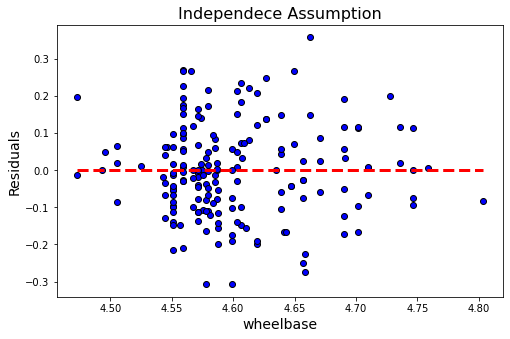

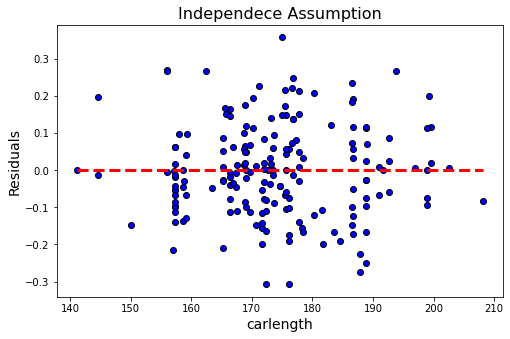

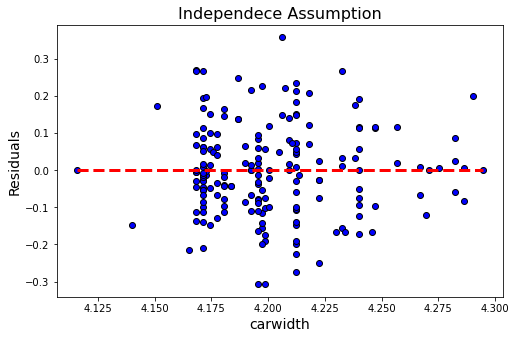

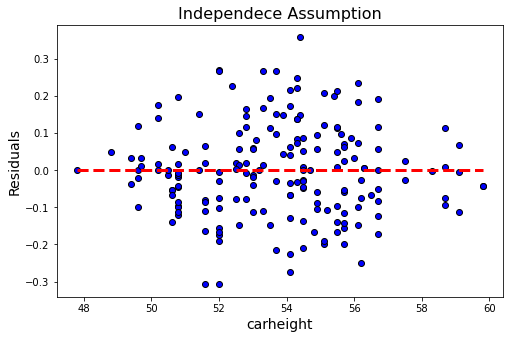

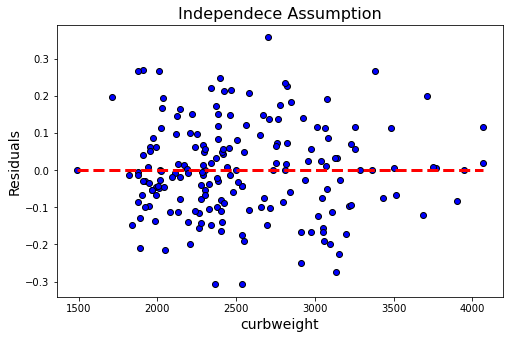

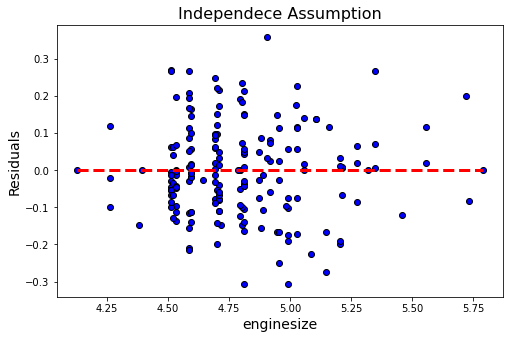

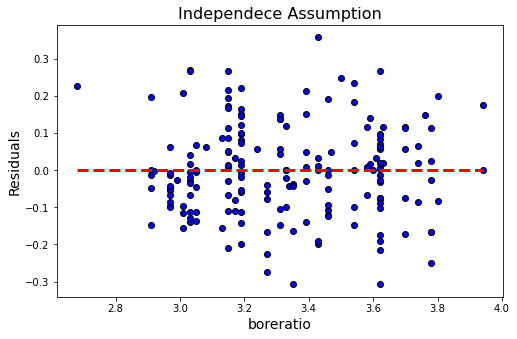

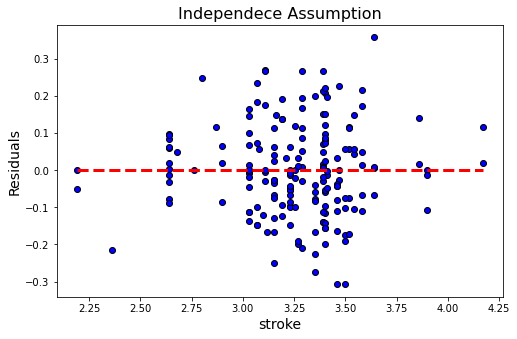

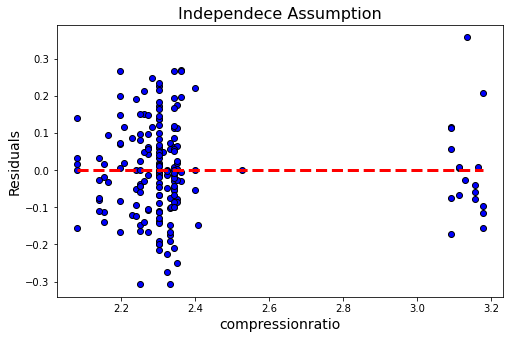

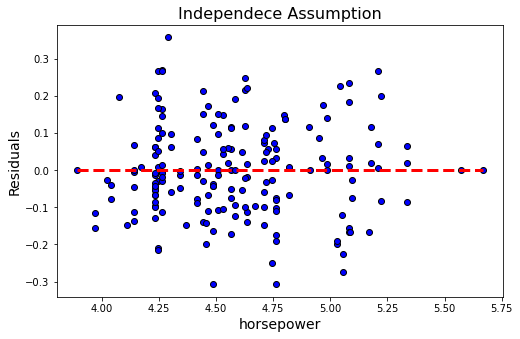

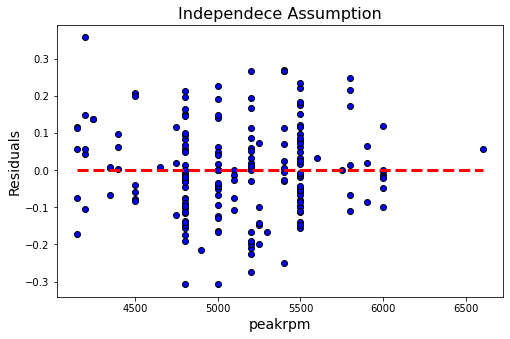

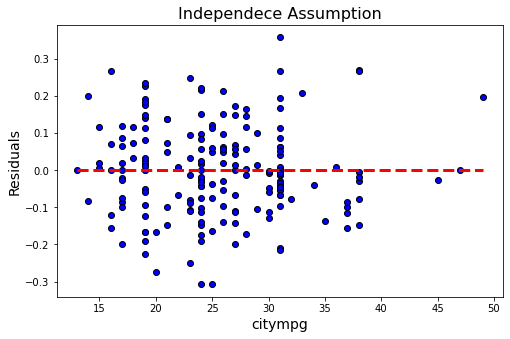

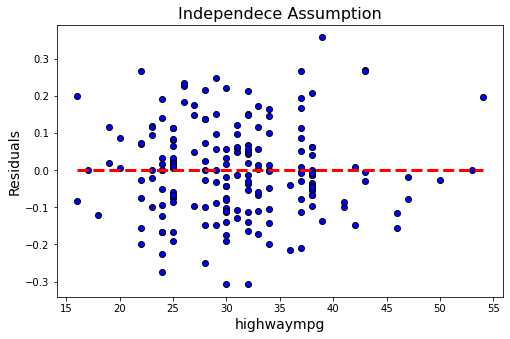

In [37]:
# Independece assumption

variables = X_treino[['wheelbase', 'carlength', 'carwidth', 'carheight',
                      'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
                      'horsepower', 'peakrpm', 'citympg', 'highwaympg']].columns.to_list()

for col in variables:
    plt.figure(figsize=(8, 5))
    plt.title('Independece Assumption', fontsize=16)
    plt.scatter(x=X_treino[col], y=results.resid, color='blue', edgecolor='k')
    plt.hlines(y=0, xmin=min(X_treino[col]), xmax=max(X_treino[col]), color='red', linestyle='--', lw=3)
    plt.xlabel(col, fontsize=14)
    plt.ylabel('Residuals', fontsize=14)
    plt.show()

## Homoscedasticity
The assumption of a data set to have constant variance is called homoscedasticity. And it’s opposite, where the variance is a function of explanatory variables X is called heteroscedasticity.

Below we can see the response values (as per the model) vs the residuals, they are randomly distributed attending the Homoscedasticity assumption.

Why the Homoscedasticity assumption is important?

Because, if the residual errors are not identically distributed, we cannot use tests of significance or perform confidence interval checking. These tests assume that the residuals are independent and equally distributed.

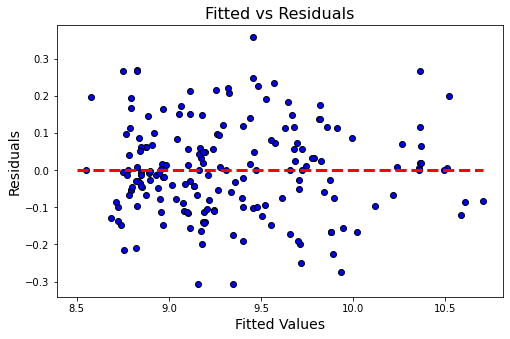

In [38]:
# Homoscedasticity plot

plt.figure(figsize=(8, 5))
plt.title('Fitted vs Residuals', fontsize=16)
plt.scatter(x=results.fittedvalues, y=results.resid, color='blue', edgecolor='k')
plt.hlines(y=0, xmin=8.5, xmax=max(results.fittedvalues), color='red', linestyle='--', lw=3)
plt.xlabel('Fitted Values', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.show()

## Normality of Resids
As we can see below the residuals of our model pass in the normality test since the distribution is bell shaped and the p-value of shapiro test is higher than 0.05

What’s normality test telling us is that most of the prediction errors from your model are zero or close to zero and large errors are much less frequent than the small errors.

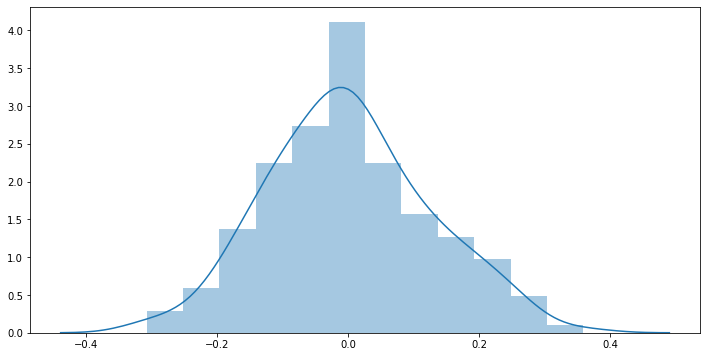

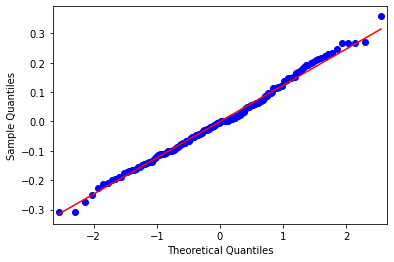

In [39]:
# Distribucion
f, ax = plt.subplots(figsize=(12, 6))
sns.distplot(results.resid)

# qqplot
norm = sm.qqplot(results.resid, line='s')

### Shapiro Test

In [40]:
# Normality Shapiro test
stats, p = shapiro(results.resid)
print(f'Statistics p-value: {p}')
# Interpret
alpha = 0.05
if p > alpha:
    print('Resids looks Gaussian (fail to reject H0)')
else:
    print('Resids does not look Gaussian (reject H0)')

Statistics p-value: 0.5683228373527527
Resids looks Gaussian (fail to reject H0)
